In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
users = pd.read_csv('yelp_user\\yelp_user.csv')

In [3]:
users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [4]:
users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [5]:
good_users = users[users['review_count']>9]

In [6]:
good_users = good_users[good_users['useful']>4]


In [7]:
good_users.shape

(212352, 22)

In [8]:
good_users.head()
good_users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [9]:
good_users = good_users.drop(['review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'], axis=1)
good_users.head()

,user_id,name
18,jYnkJR3T8yCERXywoVhWYA,Hugo
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle
58,NNUCy-mWCYCROLs1wJRmCQ,Heather
73,gkMSWgpoBcc96JqhMFbKJg,Laura
74,aw973Pm1nrTbRjP4zY9B9g,Kenny


In [10]:
business = pd.read_csv('yelp_business\\yelp_business.csv')

In [11]:
business.head()
business.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')

In [12]:
restaurants = business[business['categories'].str.contains('Restaurants') ]

In [13]:
restaurants = restaurants.drop(['neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'], axis=1)
restaurants.head()

,business_id,name
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap"""
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina"""
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee"""
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center"""
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering"""


In [14]:
review = pd.read_csv('yelp_review\\yelp_review.csv')

In [15]:
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [16]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [17]:
review.shape

(5261668, 9)

In [18]:
merged = pd.merge(restaurants,review, on = 'business_id')
merged.shape

(3221418, 10)

In [19]:
merged.head()
small_merge = merged[:300000]
small_merge.shape

(300000, 10)

In [20]:
merged.columns

Index(['business_id', 'name', 'review_id', 'user_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [21]:
ratings = pd.DataFrame(merged.groupby('name')['stars'].mean())

In [22]:
ratings.head()

,stars
name,
"""#1 Fried Rice""",3.473684
"""#1 Hawaiian Barbecue""",3.687500
"""#1 Pho""",3.714286
"""#1 Sushi""",4.218182
"""#1Brothers Pizza""",3.016667


In [23]:
ratings.shape

(38154, 1)

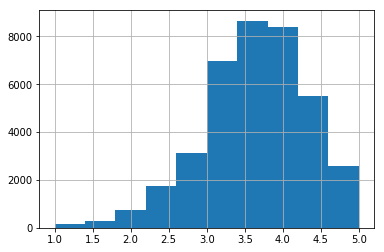

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['stars'].hist(bins = 10)

In [25]:
ratings['stars'].describe()

count    38154.000000
mean         3.629126
std          0.688916
min          1.000000
25%          3.213571
50%          3.680932
75%          4.117647
max          5.000000
Name: stars, dtype: float64

In [26]:
n_ratings = pd.DataFrame(merged.groupby('name')['stars'].count())
n_ratings.head()

,stars
name,
"""#1 Fried Rice""",38
"""#1 Hawaiian Barbecue""",32
"""#1 Pho""",7
"""#1 Sushi""",55
"""#1Brothers Pizza""",60


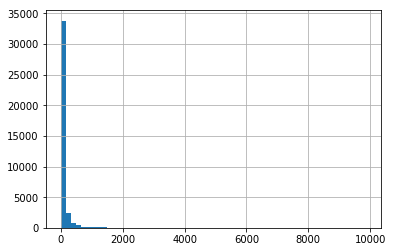

In [27]:
n_ratings['stars'].hist(bins=60)

In [28]:
n_ratings['stars'].describe()

count    38154.000000
mean        84.431986
std        253.174400
min          2.000000
25%          7.000000
50%         21.000000
75%         68.000000
max       9840.000000
Name: stars, dtype: float64

C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


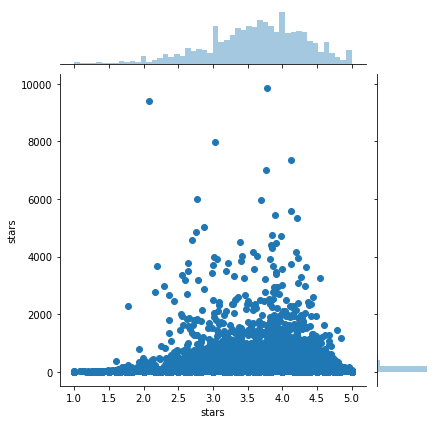

In [29]:
import seaborn as sns
sns.jointplot(x=ratings['stars'], y=n_ratings['stars'], data=ratings)

In [30]:
small_merge_pivot = small_merge.pivot_table(index ='name', columns = 'user_id', values = 'stars').fillna(0)
small_merge_pivot.shape

(4232, 190566)

In [31]:
small_merge_pivot.head()


user_id,---1lKK3aKOuomHnwAkAow,--2HUmLkcNHZp0xw6AMBPg,--2vR0DIsmQ6WfcSzKWigw,--4q8EyqThydQm-eKZpS-A,--4rAAfZnEIAKJE80aIiYg,--4uW4yJiRT2oXMYkCPq1Q,--8g9UaBe0xQ4FD0q34h_A,--BumyUHiO_7YsHurb9Hkw,--CH8yRGXhO2MmbF-4BWXg,--CIuK7sUpaNzalLAlHJKA,...,zzitZPIJBmyxt8DefrJygg,zzjIDvHGrYt2KK68Ip8zuw,zzjQuRnY_Kgr_zaw6A-ACQ,zzltQbbtriSWWdNINMzJUw,zzmOO3R--Yo59kI5_6In8A,zznZTSALzMXf3cjggfNdBQ,zzrDwXf7UcMWYBFnkKKPXg,zzvqVZTYs5VKxPc-IkRQ4A,zzw0Z6-_VDp9ShIRSKIsQw,zzxZoMmjbUjXcWZzrE3PIw
name,,,,,,,,,,,,,,,,,,,,,
"""#1 Sushi""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""0109 Dessert & Chocolate""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""100 Degrees Hot Pot""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""101 Bistro""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""12 East Cafe""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', n_neighbors = 20)
model_knn.fit(small_merge_pivot)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

In [51]:
query_index = np.random.choice(small_merge_pivot.shape[0])
distances, indices = model_knn.kneighbors(small_merge_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 20)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(small_merge_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, small_merge_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

MemoryError: 

In [ ]:
query_index = np.random.choice(small_merge_pivot.shape[0])
distances, indices = model_knn.kneighbors(small_merge_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 4231)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(small_merge_pivot.index[query_index]))
    else:
        print('{0}: {1}, with expected rating of {2}:'.format(i, small_merge_pivot.index[indices.flatten()[i]], distances.flatten()[i]*5))

In [49]:
distances.hist(bins=10)

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [36]:
small_merge_pivot.iloc[query_index, :].values.reshape(1, -1)


array([[0., 0., 0., ..., 0., 0., 0.]])

In [37]:
small_merge_pivot.iloc[query_index, :]


user_id
---1lKK3aKOuomHnwAkAow    0.0
--2HUmLkcNHZp0xw6AMBPg    0.0
--2vR0DIsmQ6WfcSzKWigw    0.0
--4q8EyqThydQm-eKZpS-A    0.0
--4rAAfZnEIAKJE80aIiYg    0.0
--4uW4yJiRT2oXMYkCPq1Q    0.0
--8g9UaBe0xQ4FD0q34h_A    0.0
--BumyUHiO_7YsHurb9Hkw    0.0
--CH8yRGXhO2MmbF-4BWXg    0.0
--CIuK7sUpaNzalLAlHJKA    0.0
--DxiDMQgN08E5gTM0aj7Q    0.0
--EMqnd727rtC0G5Oc-Mrg    0.0
--HCoE1ghaAlcaAfshICgw    0.0
--IYQykIJoVtoae5WChZiw    0.0
--L85n0ZsJb2qHsGqpiYWw    0.0
--NIc98RMssgy0mSZL3vpA    0.0
--Nnm_506G_p8MxAOQna5w    0.0
--O1bi61whjxObUkR0a16w    0.0
--PMDzKmaztRxUvH4iCz2w    0.0
--PPmv8YIKhc9gZaLwLI9w    0.0
--Qh8yKWAvIP4V4K8ZPfHA    0.0
--RlSfc-QmcHFGHyX6aVjA    0.0
--TZHD9ZPyUXXlQklR_1lQ    0.0
--XpHLy__U2RF_dkWCmmjw    0.0
--YhjyV-ce1nFLYxP49C5A    0.0
--ZNfWKj1VyVElRx6-g1fg    0.0
--amZ_cR9Zgu4B1RrAHJyA    0.0
--eQVss9nAx54FWsZHZgpA    0.0
--fF_pQlaU9sME-HLCoHlQ    0.0
--fpTdHQOGWGbAjk9SUyeA    0.0
                         ... 
zzMJLd3cWBM6HT8eMbOGbA    0.0
zzMdJsE3nxfgY2Yb5mlN1A    0.0
zz

In [45]:
sm =small_merge_pivot.loc[(small_merge_pivot!=0.0).any()]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [ ]:
sm.shape